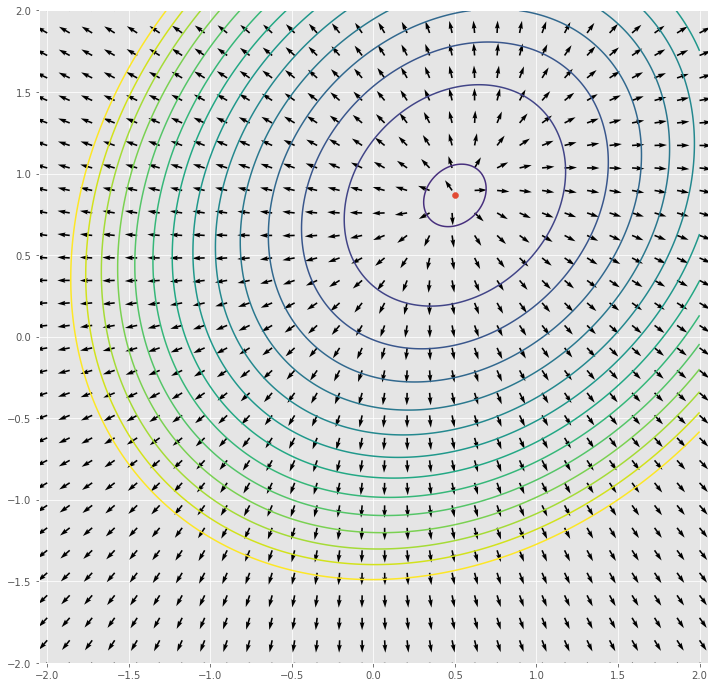

In [78]:
import numpy as np
import matplotlib.pyplot as plt 

def draw_vector_field_2(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines_2(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 


J = lambda x, y: 3*(x**2)+3*(y**2)-2*(x*y)-3*x-7*y+9
GJ  = lambda x, y : np.array([6*x-2*y-3, 6*y-2*x-7])

f1 = lambda x, y : x**2+y**2-1
f2 = lambda x, y : 2*x-1
Gf1 = lambda x, y : np.array([2*x, 2*y])
Gf2 = lambda x, y : np.array([2,0])

Gf1l = lambda x, y,l : np.array([2*x*l, 2*y*l])
Gf2l = lambda x, y,l : np.array([2*l,0])


L = lambda x, y, l1,l2 : J(x,y) + l1*f1(x,y) + l2*f2(x,y)
GL = lambda x, y, l1,l2 : GJ(x,y) + Gf1l(x,y,l1) + Gf2l(x,y,l2)
L_gen = lambda l1,l2 : lambda x,y : L(x, y, l1,l2)
GL_gen = lambda l1,l2 : lambda x,y : np.array([6*x-2*y-3+2*x*l1+2*l2, 6*y-2*x-7+2*y*l1])

l1_star = 8/np.sqrt(3)-3
l2_star = (3+np.sqrt(3))/2-4/np.sqrt(3)
L_star = L_gen(l1_star,l2_star )
GL_star = lambda x, y : np.array([6*x-2*y-3+2*x*l1_star+2*l2_star, 6*y-2*x-7+2*y*l1_star])

x_star,y_star = 1/2,np.sqrt(3)/2

plt.style.use("ggplot")
plt.figure(figsize=(12,12))
level_lines_2(L_star, -2, 2, -2, 2, np.linspace(0, 28, 16))
draw_vector_field_2(GL_star ,  -2, 2, -2, 2,30)
plt.scatter(1/2,np.sqrt(3)/2)
plt.axis('equal')
plt.show()



In [116]:
import plotly.graph_objects as go
import plotly.express as px
def plot_graph(scx,scy):
    
    x, y = np.linspace(x_star-scx, x_star+scx, 100), np.linspace(y_star-scy, y_star+scy, 100)
    xv,yv=np.meshgrid(x, y)
    fig = go.Figure(data=[go.Surface(z=L_star(xv,yv), x=x, y=y,colorscale='Viridis')])
    fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
    fig.show()

plot_graph(1,1)


flag = OK, n_iter = 100


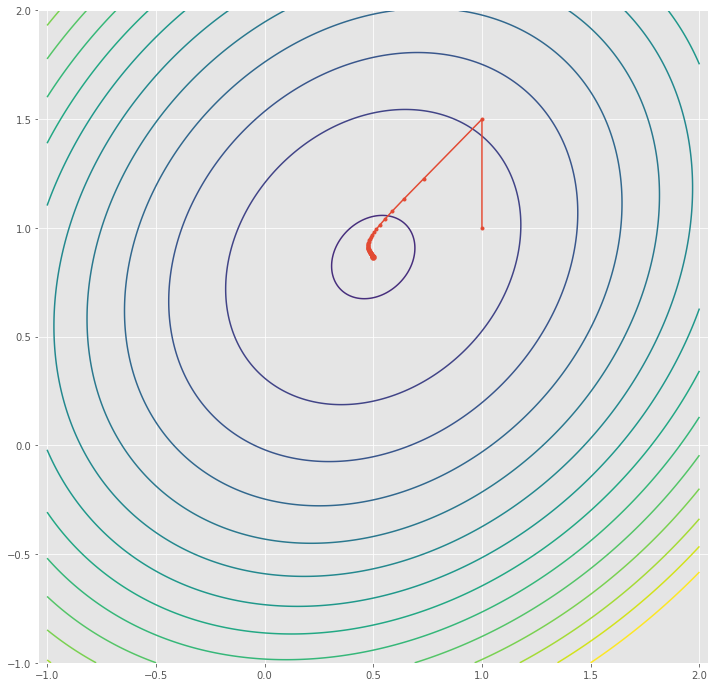

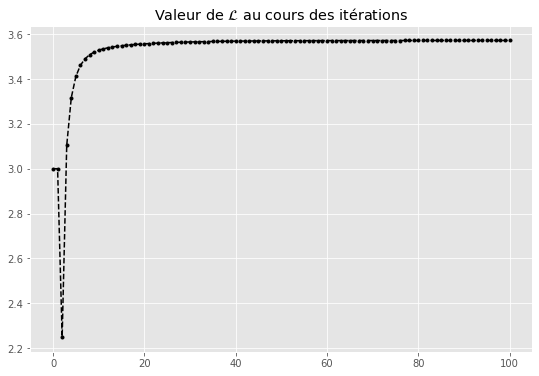

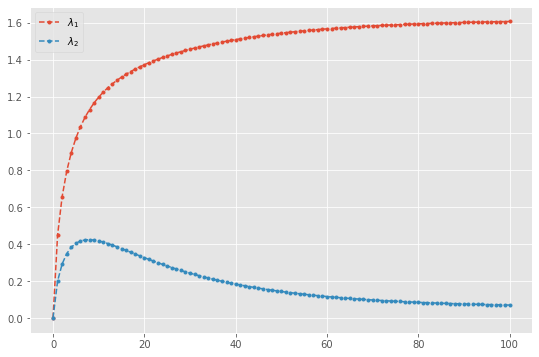

nbre d'itérations : 100
min [0.4987341  0.86802555]
lambda [1.60714173 0.07000036]
l_star 1.6188021535170067 0.056624327025935006


In [115]:
from sklearn.svm import l1_min_c

l1,l2 = 0,0

f,df = L_gen(l1,l2),GL_gen(l1,l2)

pi = lambda l,alpha,f,x,y : (l+alpha*f(x,y)>0)*(l+alpha*f(x,y))
new_x = lambda l1,l2 : np.linalg.inv(np.array([[6+2*l1,-2],[-2,6+2*l1]]))@np.array([3-2*l2,7])

    
## Parametres
epsilon = 1e-30


itermax = 100
## initialisation 
iter = 0
x, y, alpha = 1, 1, 0.2
fz = f(x,y)
Z, F =[np.array([x, y])], [fz]
flag = 'OK'
L_lambda =[[l1,l2]]
X = [np.array([x,y])] # array for the values of $x^k$
F = [f(x,y)] # array for the values of $f(x^k)$
niter =0


## Boucle d'optimisation
while (iter < itermax):
    new_fz = f(x,y) 
    f,df = L_gen(l1,l2),GL_gen(l1,l2)
    x, y = new_x(l1,l2)
    l1,l2= pi(l1,alpha,f1,x,y),pi(l2,alpha,f2,x,y)
    
    fz =new_fz
    Z.append(np.array([x, y]))
    F.append(fz)
    L_lambda.append([l1,l2])
    
    iter += 1
L_lambda = np.array(L_lambda)
print('flag = '+flag + ', n_iter = ' + str(iter))    
    
Z = np.array(Z)
F = np.array(F)

# représentations graphiques 
plt.figure(figsize=(12,12))
plt.plot(Z[:,0],Z[:,1],'.',linestyle='-')
plt.style.use("ggplot")
level_lines_2(L_star, -1, 2, -1, 2, np.linspace(0, 28, 16))
# draw_vector_field_2(GL_star ,  -2, 2, -2, 2,30)
plt.scatter(1/2,np.sqrt(3)/2)
plt.axis('equal')
plt.show()


# Représentation des valeurs prises par f au cours des itérations.
plt.figure(figsize=(9,6))
plt.plot(range(len(F)),F,'.',linestyle='dashed',color="black")
plt.title("Valeur de $\mathcal{L}$ au cours des itérations")
plt.show()

plt.figure(figsize=(9,6))

plt.plot(range(len(L_lambda)),L_lambda[:,0],'.',linestyle='dashed',label="$\lambda_1$")
plt.plot(range(len(L_lambda)),L_lambda[:,1],'.',linestyle='dashed',label="$\lambda_2$")

plt.legend()
plt.show()

print("nbre d'itérations :", iter)
print("min",Z[-1])
print("lambda", L_lambda[-1])
print("l_star",l1_star,l2_star)